# 4329 Session 2

Long-run relationships in finance and multivariate time series

* Cointegration
* Vector Error Correction Models

Modeling Volatility

* ARCH, GARCH

### Data set with treasury yields (3 month, 6 month, 1 year, 2 year, 3 year)

In [27]:
data = read.csv('https://people.orie.cornell.edu/davidr/SDAFE/data/yields2009.csv')
data = data[, c(3, 4, 5, 6, 7)]
data = as.ts(data)

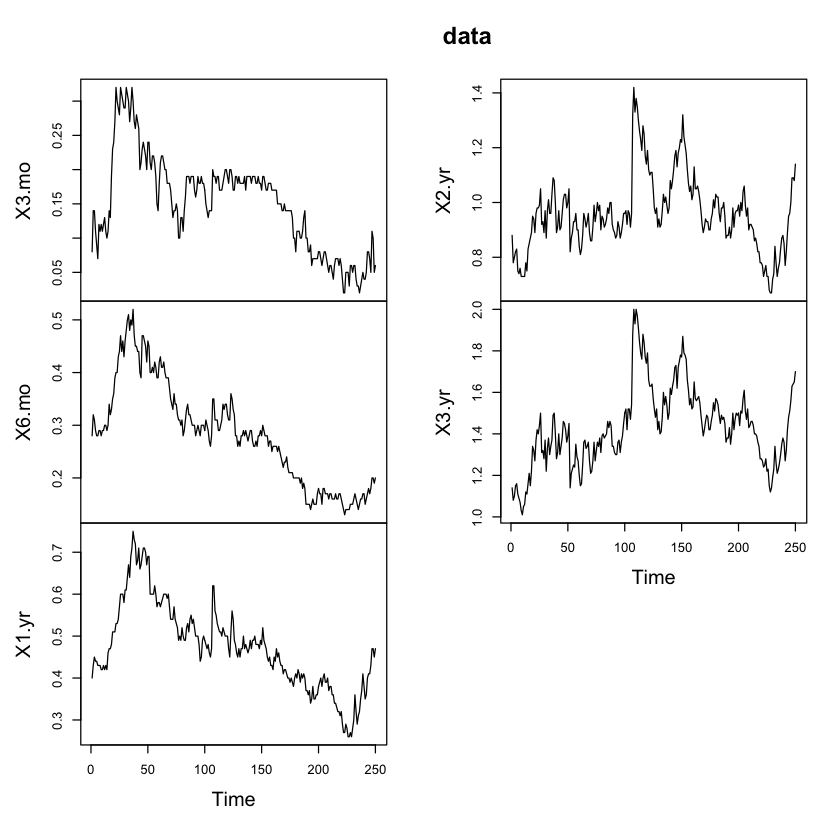

In [28]:
plot(data, nc = 2)

## Philips-Oularis test: `po.test` (package `tseries`)

In [35]:
library(tseries)
po.test(data)

Warning message in po.test(data):
“p-value smaller than printed p-value”


	Phillips-Ouliaris Cointegration Test

data:  data
Phillips-Ouliaris demeaned = -54.59, Truncation lag parameter = 2,
p-value = 0.01


Small p-value, series may be cointegrated

# Fit VECM: `ca.jo` (package `urca`)

In [39]:
library(urca)
vecm = ca.jo(data)

In [41]:
summary(vecm)


###################### 
# Johansen-Procedure # 
###################### 

Test type: maximal eigenvalue statistic (lambda max) , with linear trend 

Eigenvalues (lambda):
[1] 0.115277752 0.081825508 0.076957614 0.029771920 0.005032101

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 4 |  1.25  6.50  8.18 11.65
r <= 3 |  7.50 12.91 14.90 19.19
r <= 2 | 19.86 18.90 21.07 25.75
r <= 1 | 21.17 24.78 27.14 32.14
r = 0  | 30.38 30.84 33.32 38.78

Eigenvectors, normalised to first column:
(These are the cointegration relations)

           X3.mo.l2  X6.mo.l2    X1.yr.l2   X2.yr.l2     X3.yr.l2
X3.mo.l2  1.0000000  1.000000  1.00000000  1.0000000   1.00000000
X6.mo.l2 -1.6183788  2.388577 -0.36937618 -0.1805828  40.08951726
X1.yr.l2  0.5951337 -3.813870  0.04802277 -0.1073131  26.51503673
X2.yr.l2  0.8448284  2.351050 -0.93068697 -0.1225467 -16.39550761
X3.yr.l2 -0.7199119 -1.425114  0.49000877  0.5099546   0.08419221

Weights W:
(This is the loading

***

## Volatility data 

simulate 

$r_t = \mu + a r_{t-1} + u_t$

$u_t = \epsilon_t \sigma_t $

$\sigma_t^2 = \omega + \alpha u^2_{t-1} + \beta \sigma^2_{t-1}$

$\epsilon \sim N(0,1)$



In [278]:
N = 2000
set.seed(123)
e = rnorm(N)
u = matrix(1, nrow = N)
r = matrix(0, nrow = N)
sigma2 = matrix(1, nrow = N)
for (t in 1:(N-1)) {
    u[t] = e[t] * sqrt(sigma2[t])
    sigma2[t+1] = 0.03 + 0.2*u[t]^2 + 0.8*sigma2[t]
    r[t+1] = 0.01 + 0.1*r[t] + u[t]
}

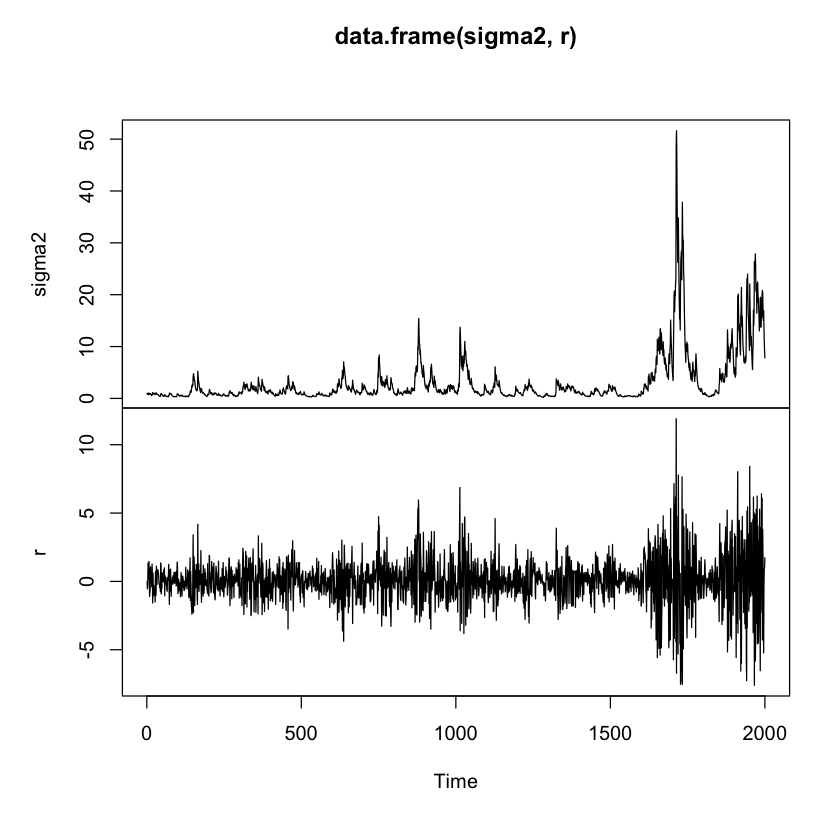

In [286]:
plot.ts(data.frame(sigma2, r))

# Fit ARCH: `ugarchfit` (package `ugarch`)

ARCH(1)

In [294]:
library(rugarch)
spec = ugarchspec(
    mean.model = list(armaOrder = c(0, 0)),
    variance.model = list(garchOrder = c(1, 0))
)

model = ugarchfit(spec, r)
coef(model)

mu        omega       alpha1 
8.509949e+00 9.207928e-07 9.990000e-01

# Fit GARCH: `ugarchfit` (package `ugarch`)

GARCH(1, 1)

In [293]:
library(rugarch)
spec = ugarchspec(
    mean.model = list(armaOrder = c(0, 0)),
    variance.model = list(garchOrder = c(1, 1))
)

model = ugarchfit(spec, r)
coef(model)

mu      omega     alpha1      beta1 
0.03677993 0.02871996 0.18551634 0.81284809

# Fit ARMA + GARCH: `ugarchfit` (package `ugarch`)

ARMA(1, 0) + GARCH(1, 1)

In [295]:
library(rugarch)
spec = ugarchspec(
    mean.model = list(armaOrder = c(1, 0)),
    variance.model = list(garchOrder = c(1, 1))
)

model = ugarchfit(spec, r)
coef(model)

mu        ar1      omega     alpha1      beta1 
0.03630359 0.05749092 0.02798696 0.18347526 0.81492257

The estimated model is:

$r_t = 0.036 + 0.057 r_{t-1} + u_t$

$u_t = \epsilon_t \sigma_t $

$\sigma_t^2 = 0.028+ 0.183 u^2_{t-1} + 0.815 \sigma^2_{t-1}$

$\epsilon \sim N(0,1)$


# Fit iGARCH: `ugarchfit` (package `ugarch`)

iGARCH(1, 1)

In [300]:
library(rugarch)
spec = ugarchspec(
    mean.model = list(armaOrder = c(0, 0)),
    variance.model = list(garchOrder = c(1, 1), model='iGARCH')
)

model = ugarchfit(spec, r)
coef(model)

mu      omega     alpha1      beta1 
0.03678540 0.02798141 0.18722582 0.81277418

#### Residuals

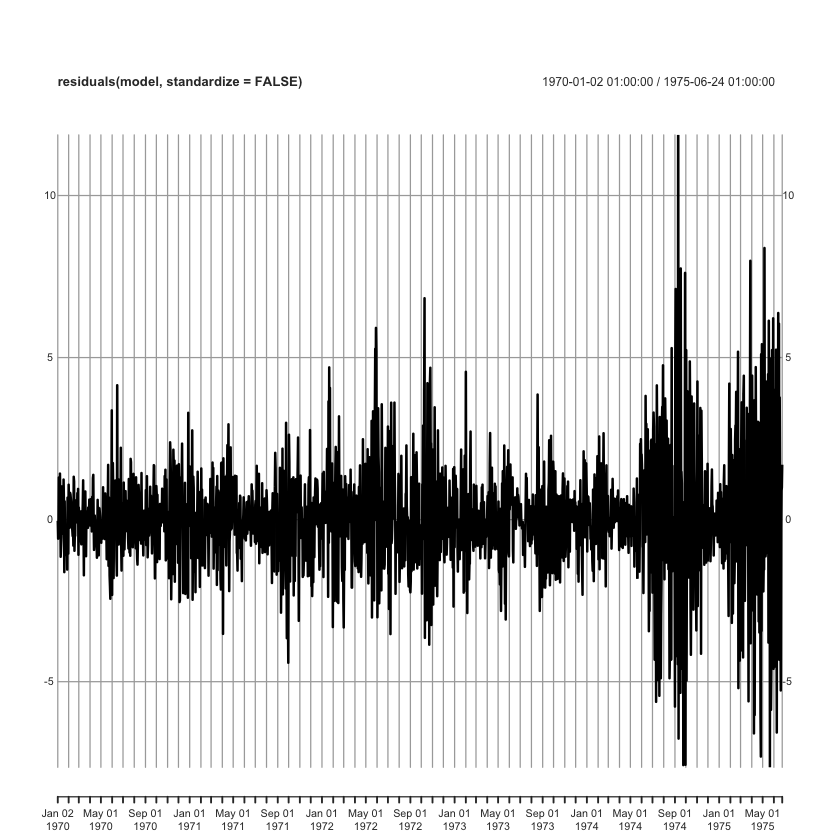

In [305]:
plot(residuals(model, standardize=FALSE))

#### Standardized residuals

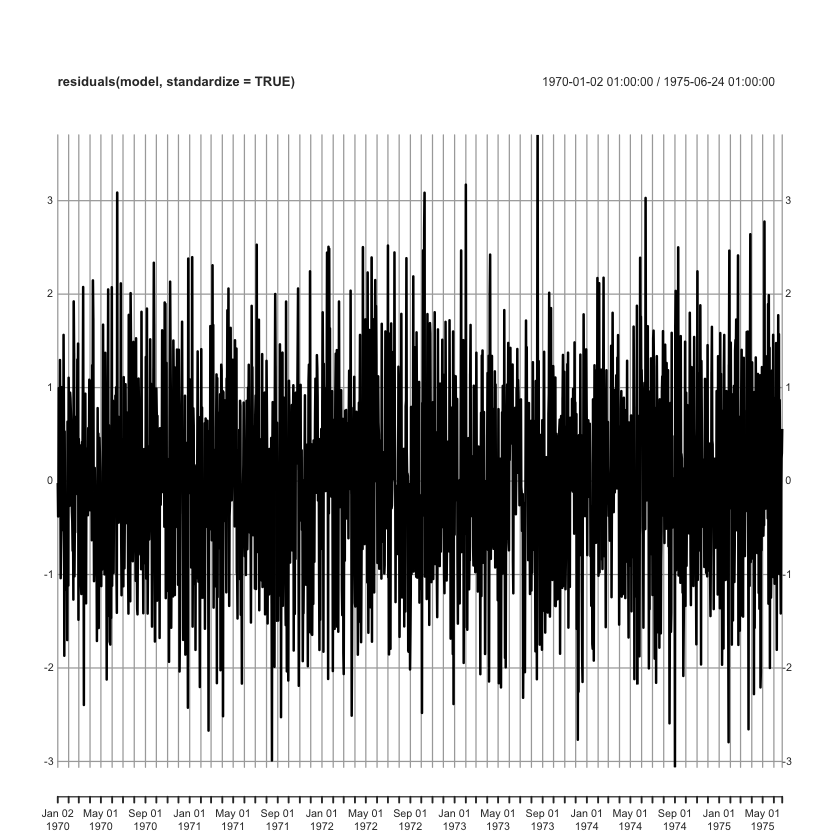

In [306]:
plot(residuals(model, standardize=TRUE))